# Exploratory Data Analysis (EDA) Steps:




### 1step: Import Libraries:

    . Pandas
    . NumPy
    . Matplotlib
    . Seaborn



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# 1- Missing Values
# 2- Handling catagorical Featuers
    --Drop Unnecessary Columns
    --Convert Numeric Columns to Suitable Data Types:
    --Duplicate Entries 
# 3- Outliers Detection
                1:visulization
                2:IQR
                3:Zscore
# 4- Featuers Scalling


### 2step: Load Data

In [3]:
df =sns.load_dataset("titanic")

### 3rd: Explore Data

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Missing values

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df['age'].fillna(df['age'].median(),inplace=True)

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Handle missing values By Pipeline 

In [7]:
# Handle missing values
#imputer = SimpleImputer(strategy='mean')
#titanic['age'] = imputer.fit_transform(titanic[['age']])

# Drop Unnecessary Columns

In [8]:
# 'deck' column ko remove karne ka example
df = df.drop('deck', axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 'Fare' aur 'Age' columns ko scale karna
df[['fare', 'age']] = scaler.fit_transform(df[['fare', 'age']])


In [10]:
print(df[['fare', 'age']])


         fare       age
0   -0.502445 -0.565736
1    0.786845  0.663861
2   -0.488854 -0.258337
3    0.420730  0.433312
4   -0.486337  0.433312
..        ...       ...
886 -0.386671 -0.181487
887 -0.044381 -0.796286
888 -0.176263 -0.104637
889 -0.044381 -0.258337
890 -0.492378  0.202762

[891 rows x 2 columns]


# Categorical Data Encoding:

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Sex, Embarked, Class, Who, Adult_male, Deck, Embark_town, Alive, Alone columns ko encode karna
categorical_columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,-0.565736,1,0,-0.502445,2,2,1,1,2,0,0
1,1,1,0,0.663861,1,0,0.786845,0,0,2,0,0,1,0
2,1,3,0,-0.258337,0,0,-0.488854,2,2,2,0,2,1,1
3,1,1,0,0.433312,1,0,0.420730,2,0,2,0,2,1,0
4,0,3,1,0.433312,0,0,-0.486337,2,2,1,1,2,0,1


# Handling categorical variables BY pipline

In [13]:
# Handling categorical variables
# numeric_features = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
# categorical_features = ['sex', 'embarked']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

## Convert Numeric Columns to Suitable Data Types:

In [14]:
# 'Pclass', 'SibSp', 'Parch' columns ko category mein convert karna
df['pclass'] = df['pclass'].astype('category')
df['sibsp'] = df['sibsp'].astype('category')
df['parch'] = df['parch'].astype('category')

In [15]:
df.dtypes

survived          int64
pclass         category
sex               int32
age             float64
sibsp          category
parch          category
fare            float64
embarked          int32
class             int32
who               int32
adult_male        int64
embark_town       int32
alive             int32
alone             int64
dtype: object

## Manually we gave yes = 1 and no = 0 For better pred

In [16]:
# 'Alive' column ko 'yes' or 'no' se 1 or 0 mein convert karna
#df['alive'] = df['alive'].map({'yes': 1, 'no': 0})

## if you want drop any coulmn

In [17]:
#df.drop('deck', axis=1, inplace=True)

In [18]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Duplicate Entries 

In [19]:
# Duplicate entries ko dekhne ke liye
print(df.duplicated().sum())


116


In [20]:
# Duplicate entries ko hata dene ka example
df = df.drop_duplicates()


In [21]:
print(df.duplicated().sum())

0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    category
 2   sex          775 non-null    int32   
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    category
 5   parch        775 non-null    category
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    int32   
 8   class        775 non-null    int32   
 9   who          775 non-null    int32   
 10  adult_male   775 non-null    int64   
 11  embark_town  775 non-null    int32   
 12  alive        775 non-null    int32   
 13  alone        775 non-null    int64   
dtypes: category(3), float64(2), int32(6), int64(3)
memory usage: 57.6 KB


In [23]:
df.shape

(775, 14)

In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [25]:
df.describe()

,survived,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,0.623226,0.016877,0.053844,1.527742,1.246452,1.216774,0.571613,1.527742,0.412903,0.563871
std,0.492674,0.484890,1.057942,1.055228,0.809467,0.853574,0.617972,0.495165,0.809467,0.492674,0.496224
min,0.000000,0.000000,-2.224156,-0.648422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.642586,-0.486337,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,-0.104637,-0.328280,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,0.510161,0.040142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,3.891554,9.667167,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000


In [26]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         4
class            3
who              3
adult_male       2
embark_town      4
alive            2
alone            2
dtype: int64

In [27]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Outliers Detection

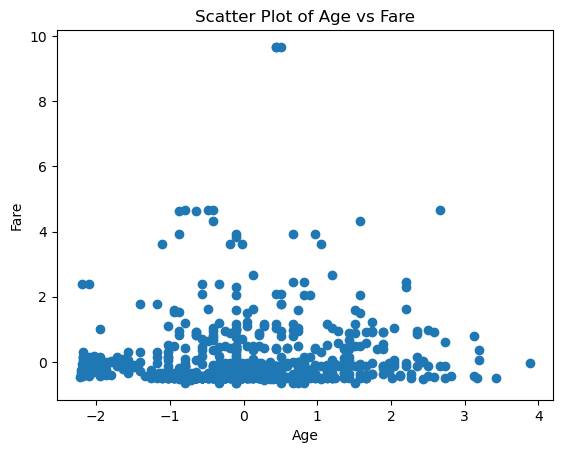

In [28]:
import matplotlib.pyplot as plt

# Example with 'fare' and 'age' columns
plt.scatter(df['age'], df['fare'])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


# Visualizing Outliers across the Entire Dataset:

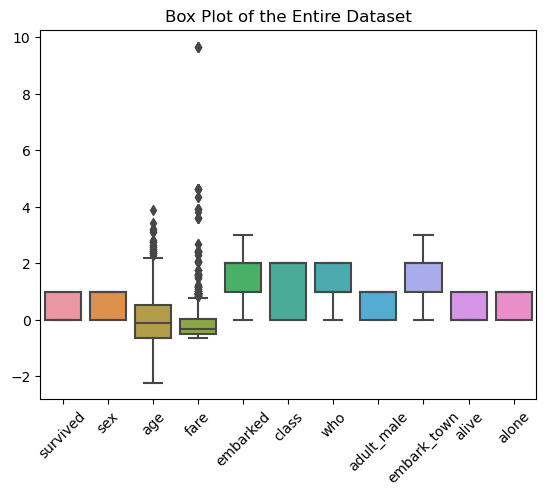

In [29]:
# Box plot for the entire dataset
sns.boxplot(data=df)
plt.title('Box Plot of the Entire Dataset')
plt.xticks(rotation=45)
plt.show()


In [30]:
print(df.dtypes)

survived          int64
pclass         category
sex               int32
age             float64
sibsp          category
parch          category
fare            float64
embarked          int32
class             int32
who               int32
adult_male        int64
embark_town       int32
alive             int32
alone             int64
dtype: object


# visulization

<Axes: xlabel='age'>

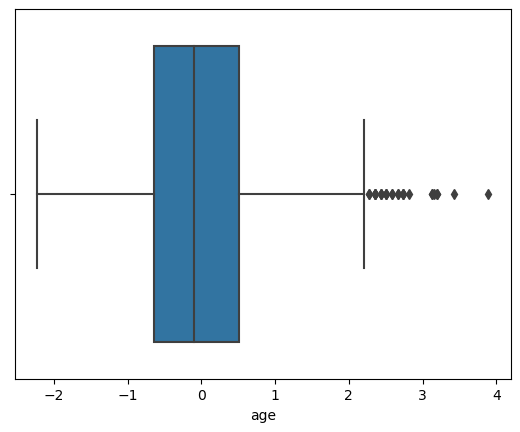

In [31]:
sns.boxplot(data=df,x='age')
#give neumeric value

<Axes: xlabel='pclass', ylabel='age'>

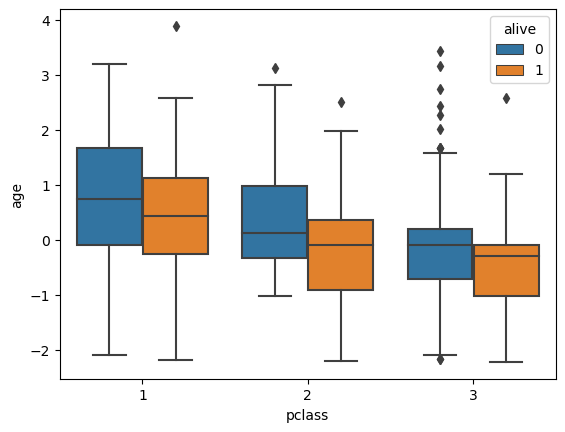

In [32]:
sns.boxplot(data=df,y='age',x='pclass', hue='alive')

# IQR(Inter Quantile Range)

In [33]:
q1 =df['age'].quantile(0.25)
q3 =df['age'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df= df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [34]:
df.shape

(748, 14)

In [35]:
q1 =df['fare'].quantile(0.25)
q3 =df['fare'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df= df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [36]:
df.shape

(649, 14)

# zscore

In [37]:
# Calculate z-scores for the 'age' column
zscore = np.abs(stats.zscore(df['age']))

# Set a threshold for identifying outliers
threshold = 3

# Identify and remove outliers based on the threshold
df_no_outliers = df[(zscore < threshold)]
df_no_outliers


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,-0.565736,1,0,-0.502445,2,2,1,1,2,0,0
2,1,3,0,-0.258337,0,0,-0.488854,2,2,2,0,2,1,1
3,1,1,0,0.433312,1,0,0.420730,2,0,2,0,2,1,0
4,0,3,1,0.433312,0,0,-0.486337,2,2,1,1,2,0,1
5,0,3,1,-0.104637,0,0,-0.478116,1,2,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,0.740711,0,5,-0.061999,1,2,2,0,1,0,0
887,1,1,0,-0.796286,0,0,-0.044381,2,0,2,0,2,1,1
888,0,3,0,-0.104637,1,2,-0.176263,2,2,2,0,2,0,0
889,1,1,1,-0.258337,0,0,-0.044381,0,0,1,1,0,1,1


In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of the Entire Dataset (After Handling Outliers)')
plt.xticks(rotation=45)
plt.show()

In [39]:
# # Identify and replace outliers in the 'age' column with the 95th percentile value
# age_95th_percentile = df['age'].quantile(0.95)
# df.loc[df['age'] > age_95th_percentile, 'age'] = age_95th_percentile


## 4th step: Univariate Analysis
### . Numeric Variables:
       .Histogram: Dikhaata hai ke data kis tarah spread hai
       .Box Plot: Dikhaata hai dataka distribution,outliers centraltendency
       .Kernel Density Plot: Dikhaata hai probability density function
       .Q-Q Plot: Dikhaata hai kya data normal distribution ko follow karta
       .Descriptive Statistics: Mean, median, mode, standard deviation
 ### Displays the distribution of the 'age' variable.


<Axes: xlabel='age', ylabel='Count'>

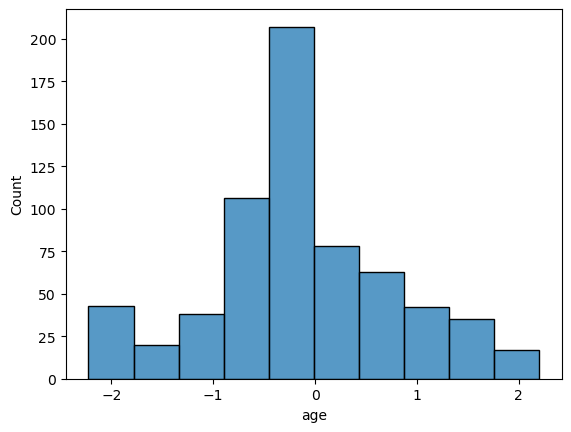

In [40]:
import seaborn as sns
sns.histplot(data=df,x="age",bins=10)

<Axes: >

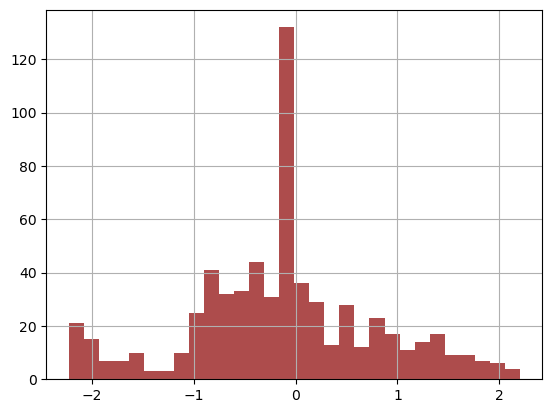

In [41]:
df["age"].hist(bins=30,color="darkred",alpha=0.7)

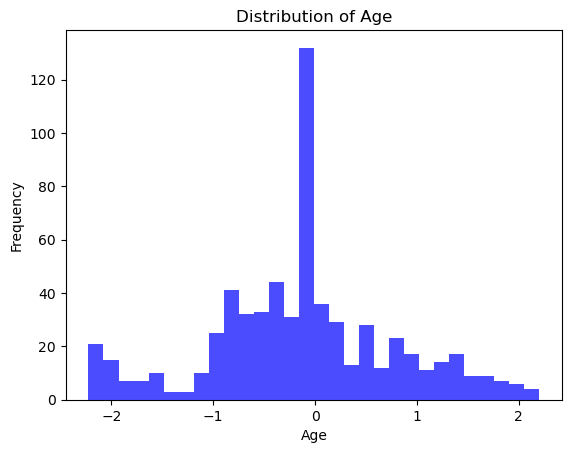

In [42]:
import matplotlib.pyplot as plt

plt.hist(df['age'],bins=30, color='blue',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


<Axes: xlabel='pclass', ylabel='count'>

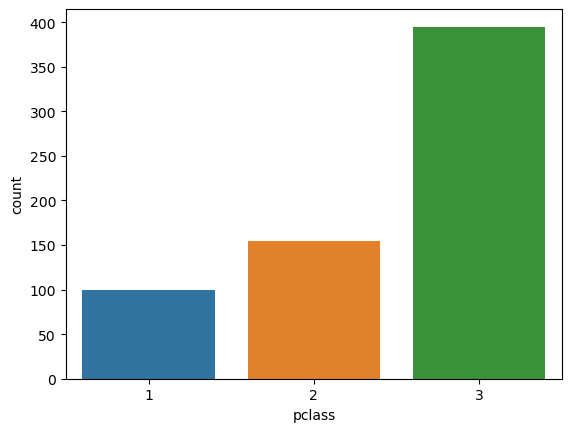

In [43]:
sns.countplot(data=df,x="pclass")

### Box Plot for Fare:

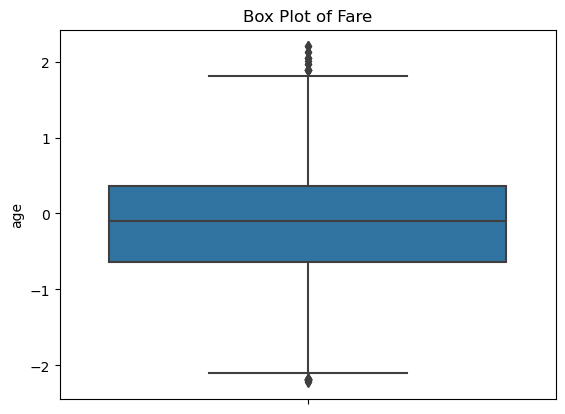

In [44]:
sns.boxplot(y='age', data=df)
plt.title('Box Plot of Fare')
plt.show()

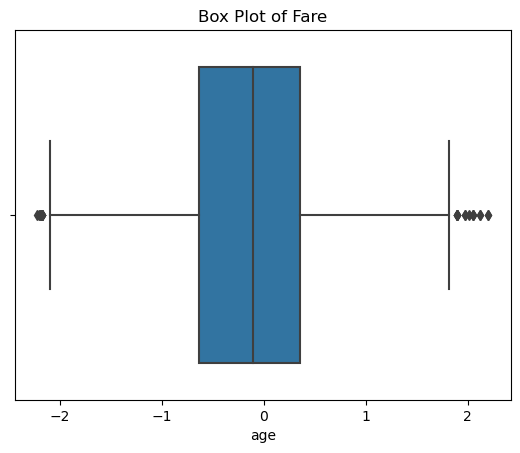

In [45]:
sns.boxplot(x='age', data=df)
plt.title('Box Plot of Fare')
plt.show()

In [46]:
df.nunique()

survived         2
pclass           3
sex              2
age             74
sibsp            7
parch            7
fare           201
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     649 non-null    int64   
 1   pclass       649 non-null    category
 2   sex          649 non-null    int32   
 3   age          649 non-null    float64 
 4   sibsp        649 non-null    category
 5   parch        649 non-null    category
 6   fare         649 non-null    float64 
 7   embarked     649 non-null    int32   
 8   class        649 non-null    int32   
 9   who          649 non-null    int32   
 10  adult_male   649 non-null    int64   
 11  embark_town  649 non-null    int32   
 12  alive        649 non-null    int32   
 13  alone        649 non-null    int64   
dtypes: category(3), float64(2), int32(6), int64(3)
memory usage: 48.4 KB


<Axes: xlabel='survived', ylabel='age'>

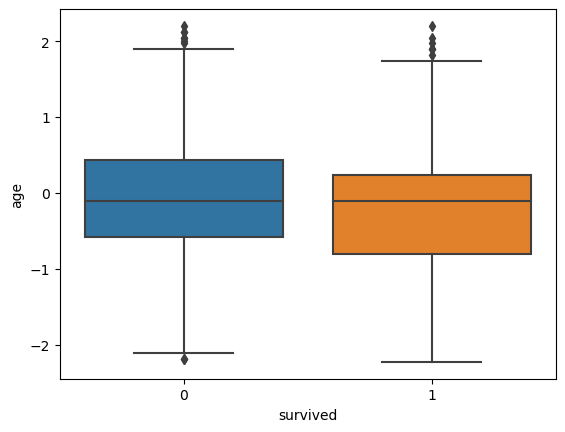

In [48]:
sns.boxplot(data=df,y='age',x='survived')

<Axes: xlabel='class', ylabel='sibsp'>

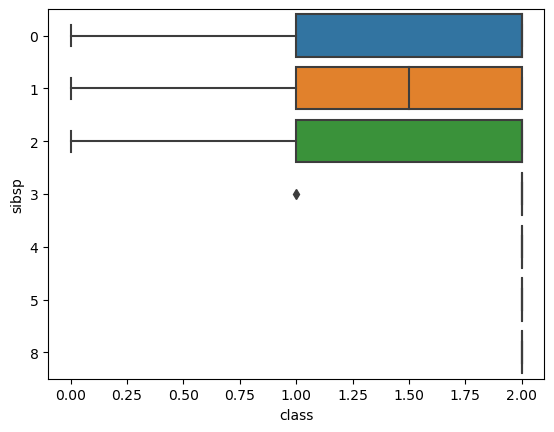

In [49]:
sns.boxplot(data=df,y='sibsp',x='class')

### Scatter Plot for Age and Fare:

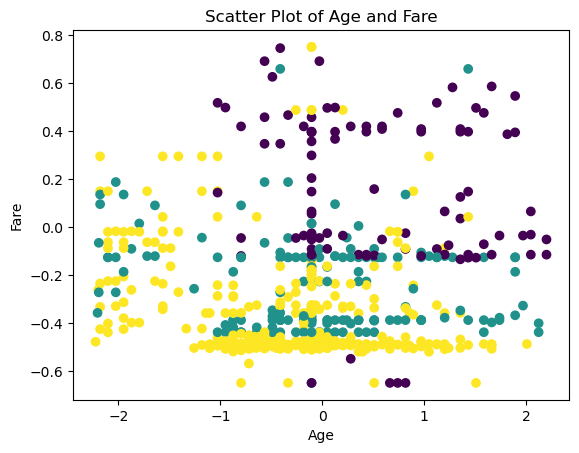

In [50]:
sns.set_palette('viridis')
plt.scatter(df['age'], df['fare'],c=df['pclass'],cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age and Fare')
plt.show() 

C:\Users\Admin\AppData\Local\Temp\ipykernel_7732\3489779275.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['fare'],color='green', shade=True)


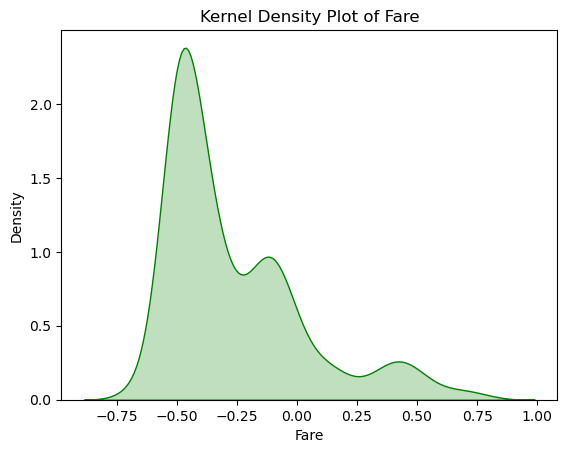

In [51]:
sns.kdeplot(df['fare'],color='green', shade=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Fare')
plt.show()

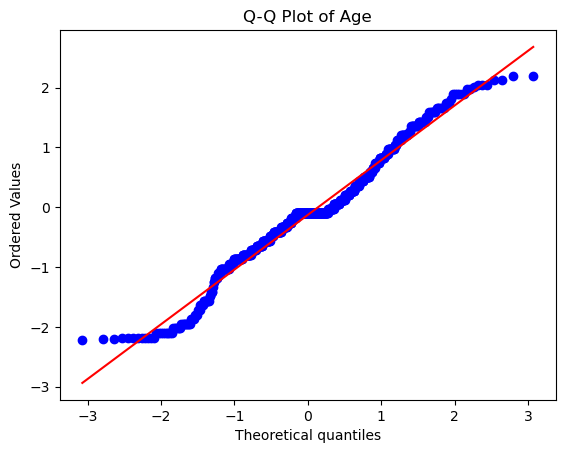

In [52]:
# Q-Q Plot for 'age'
from scipy import stats
stats.probplot(df['age'].dropna(), dist='norm', plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

In [53]:
numeric_desc_stats = df[['age', 'fare']].describe()
print(numeric_desc_stats)

              age        fare
count  649.000000  649.000000
mean    -0.128557   -0.262803
std      0.922099    0.289785
min     -2.224156   -0.648422
25%     -0.642586   -0.489442
50%     -0.104637   -0.386671
75%      0.356462   -0.119886
max      2.200858    0.751946


### Categorical Variables:
       .Bar Chart: Dikhaata hai har category ki frequency.
       .Pie Chart: Dikhaata hai categorical data ka proportion

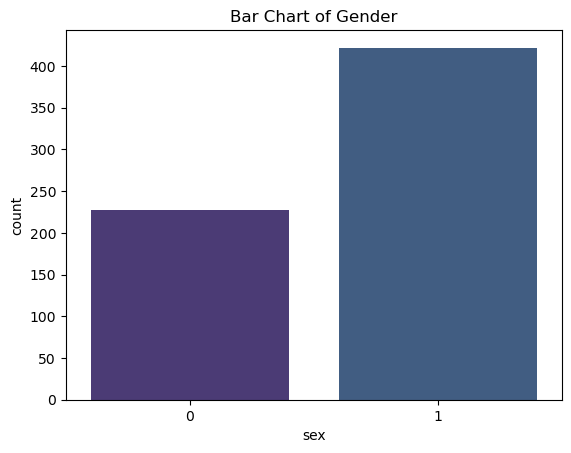

In [54]:
sns.countplot(x='sex', data=df)
plt.title('Bar Chart of Gender')
plt.show()


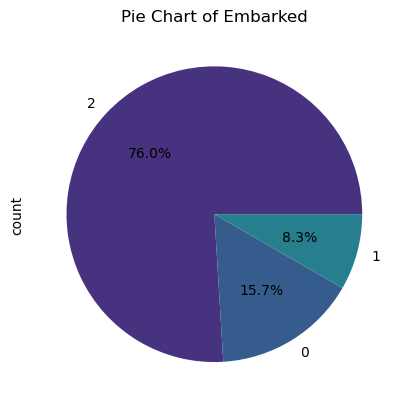

In [55]:
df['embarked'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Embarked')
plt.show()


# 5step Bivariate Analysis
### Numeric-Numeric Variables:
      .Scatter Plot:numeric variables ke darmiyan relationship.
      .Line of Best Fit: Regression line, jo linear relationship ko dikhata
      .Heatmap: Dikhaata hai correlation matrix ka visual representation.
      .Joint Plot: Combines scatter plot with univariate distributions.

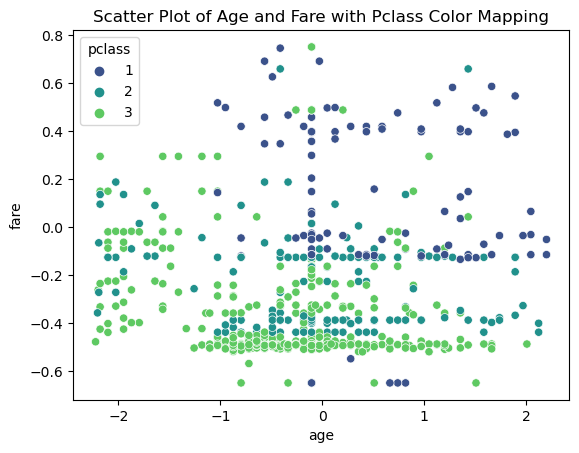

In [56]:
# Scatter Plot with Color Mapping
sns.scatterplot(x='age', y='fare', hue='pclass', data=df,palette='viridis')
plt.title('Scatter Plot of Age and Fare with Pclass Color Mapping')
plt.show()


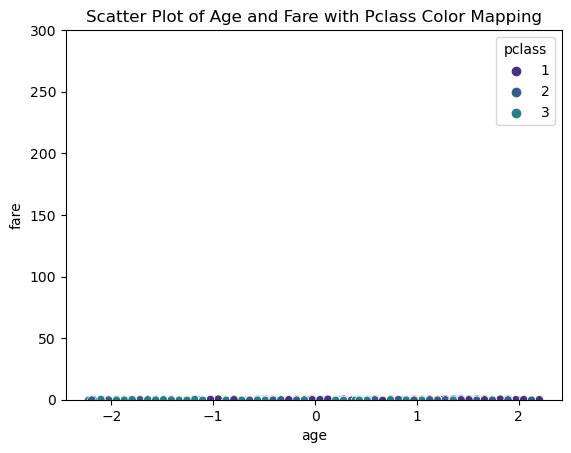

In [57]:
sns.scatterplot(x='age', y='fare', hue='pclass',data=df)
plt.title('Scatter Plot of Age and Fare with Pclass Color Mapping')
plt.ylim(0,300)
plt.show()
# use normalization

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


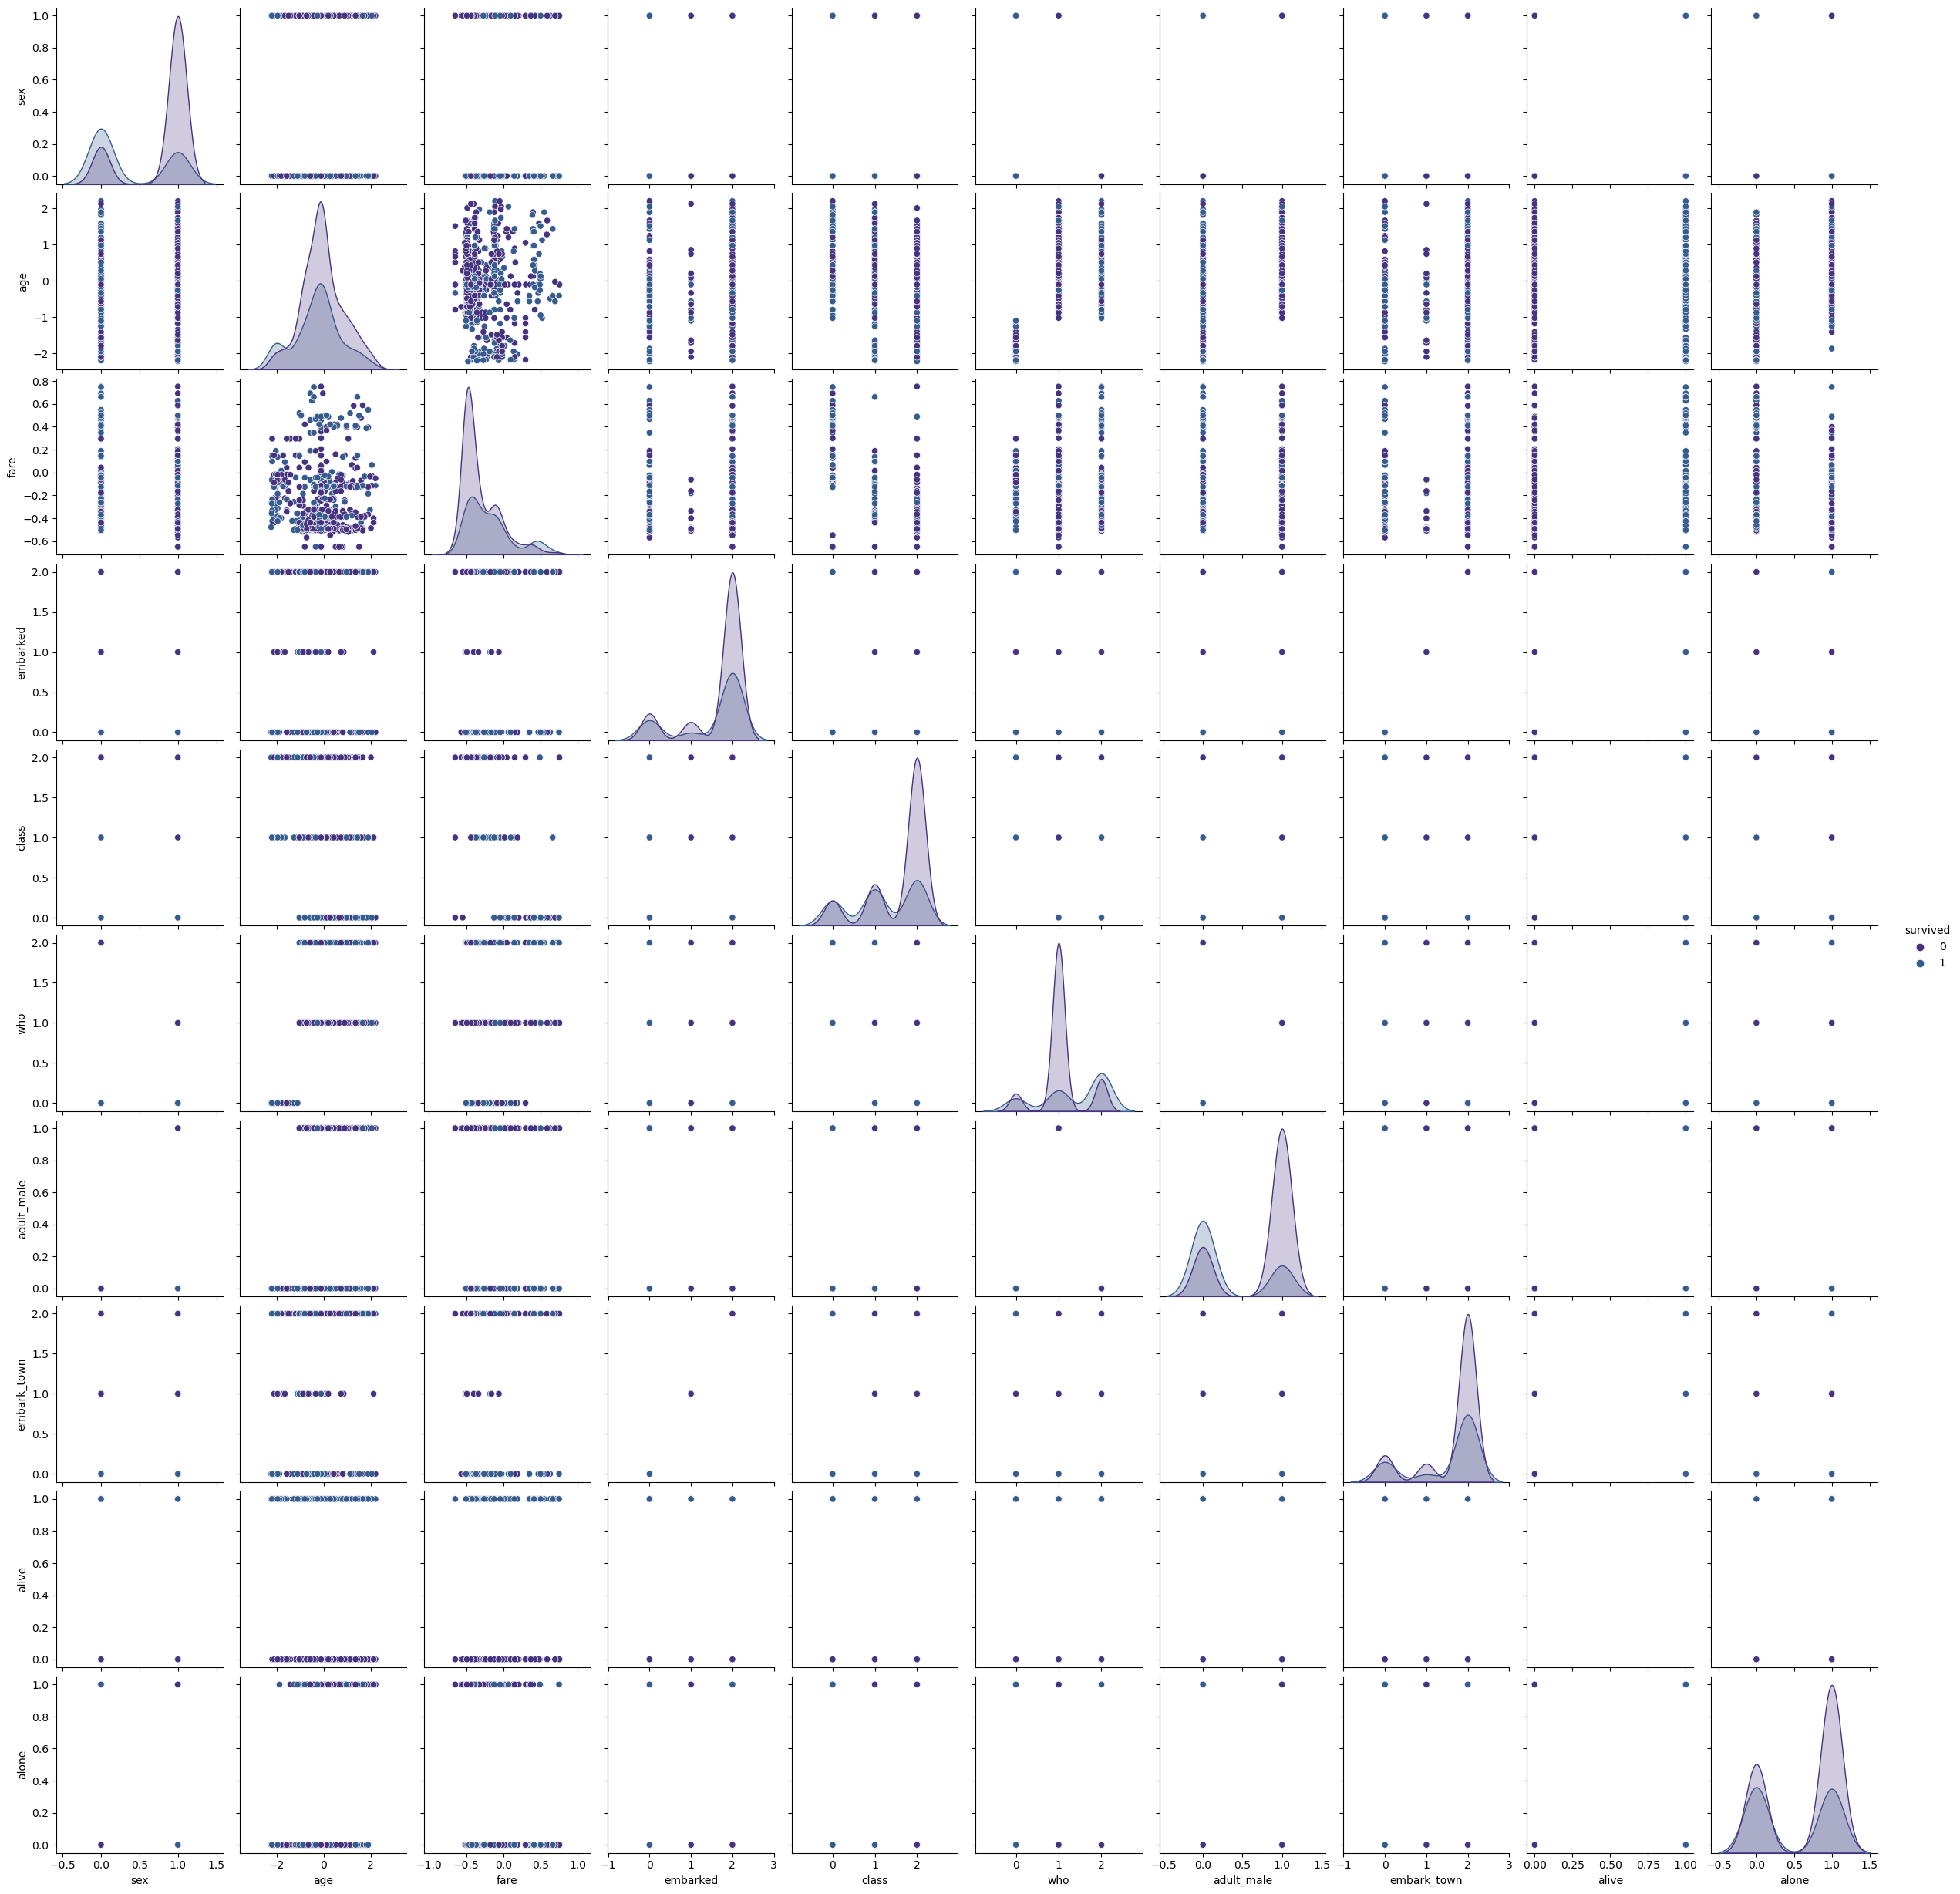

In [58]:
sns.pairplot(df,hue="survived")

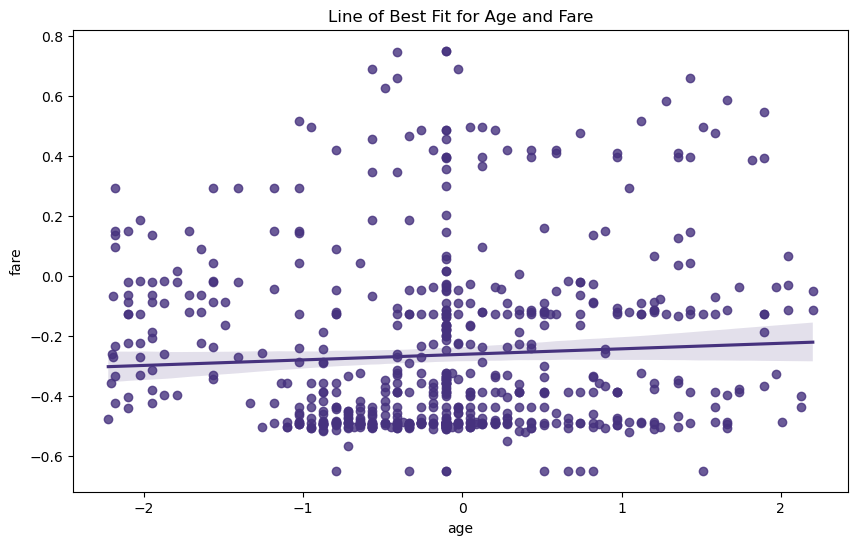

In [59]:
# Line of Best Fit (Regression Line)
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='fare', data=df)
plt.title('Line of Best Fit for Age and Fare')
plt.show()

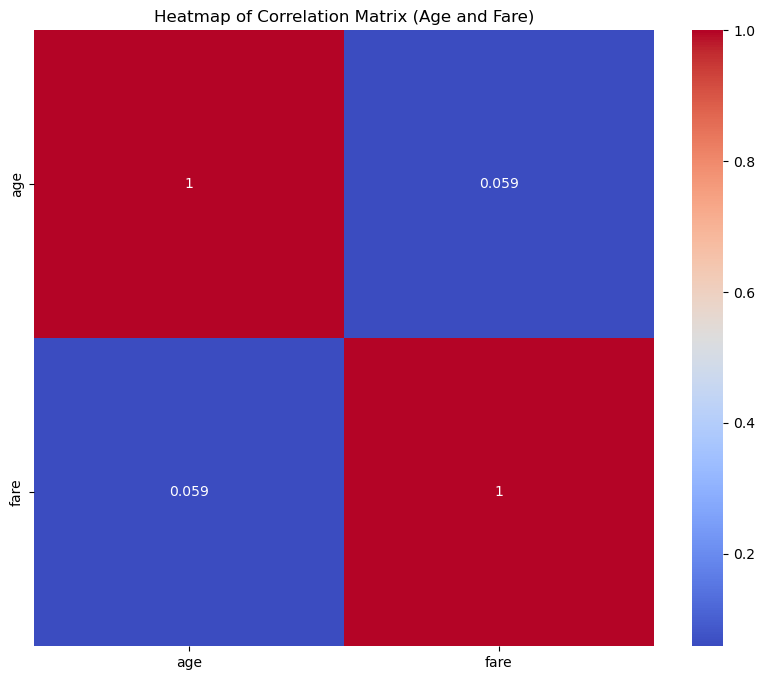

In [60]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['age', 'fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix (Age and Fare)')
plt.show()

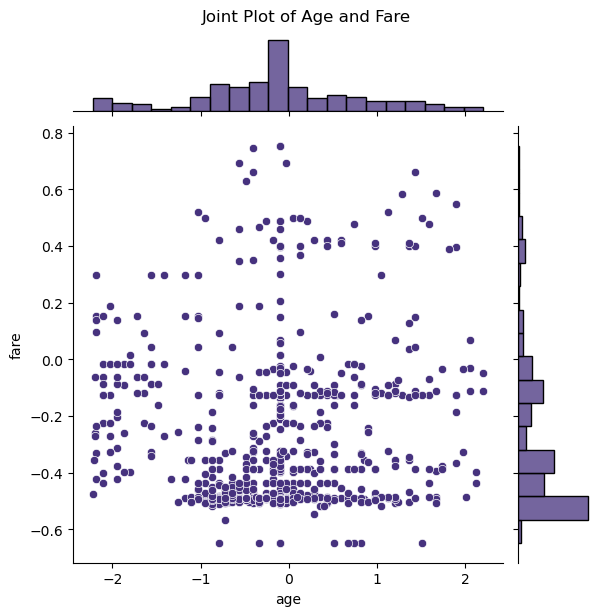

In [61]:
# Joint Plot
sns.jointplot(x='age', y='fare', data=df, kind='scatter')
plt.suptitle('Joint Plot of Age and Fare', y=1.02)
plt.show()

### Numeric-Categorical Variables:

    1 Box Plot: Dikhaata hai numeric variable ka distribution categories ke mutabiq.
    2 Violin Plot: Similar to box plot but includes kernel density estimation.
    3 Bar Chart: Agar categorical variable limited categories mein hai.

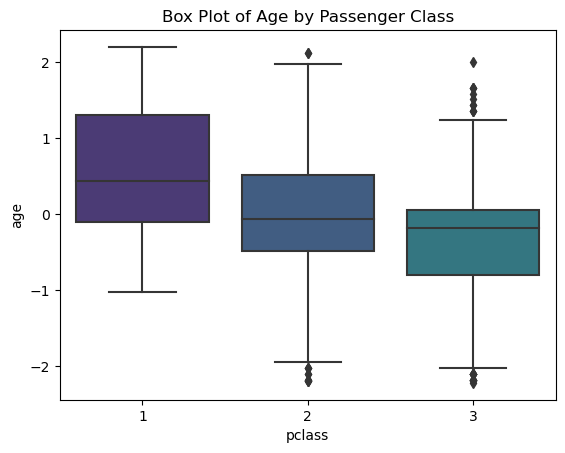

In [62]:
# Box Plot for 'pclass' and 'age'
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Box Plot of Age by Passenger Class')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


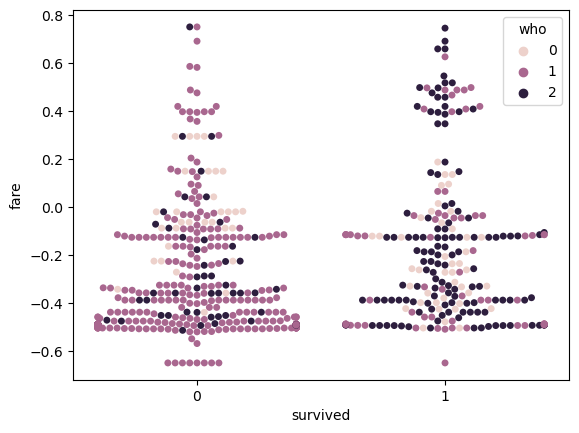

In [63]:
sns.swarmplot(data=df,x="survived",y="fare",hue='who')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


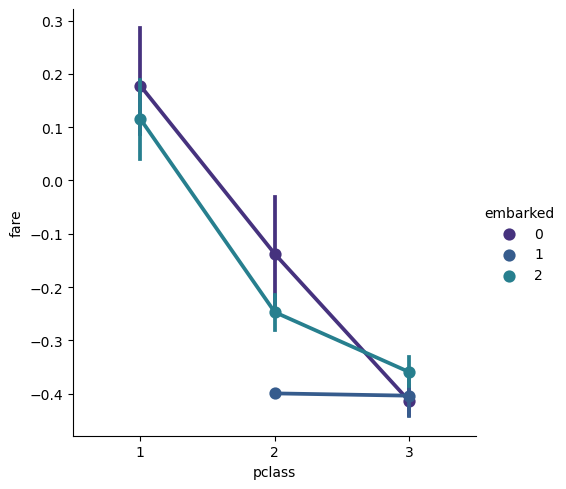

In [64]:
sns.catplot(x='pclass',y='fare',hue='embarked',kind='point',data=df)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


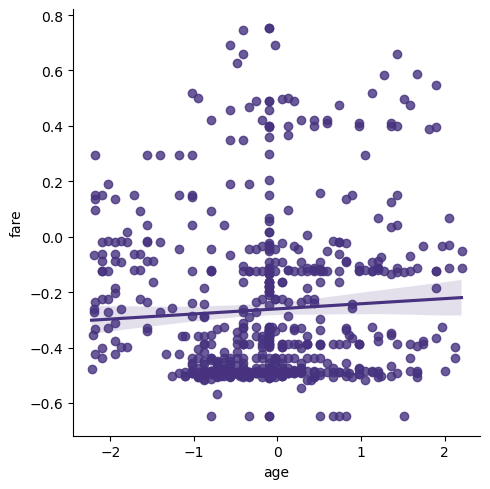

In [65]:
sns.lmplot(data=df,y='fare',x='age')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


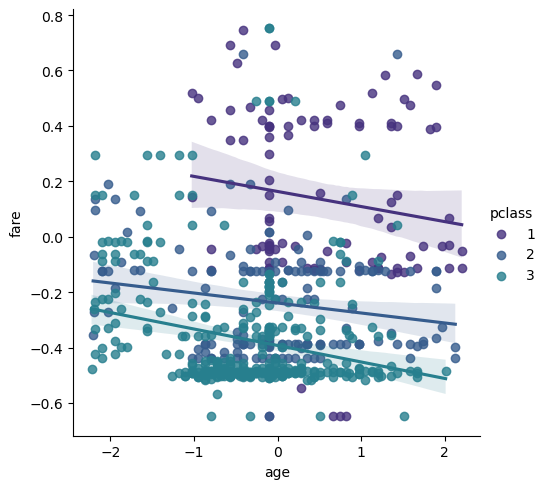

In [66]:
sns.lmplot(data=df,y='fare',x='age',hue='pclass')

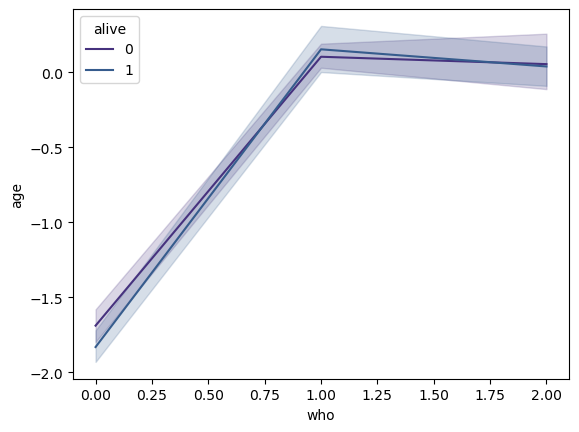

In [67]:
sns.lineplot(data=df,x="who",y="age",hue="alive")
plt.show()

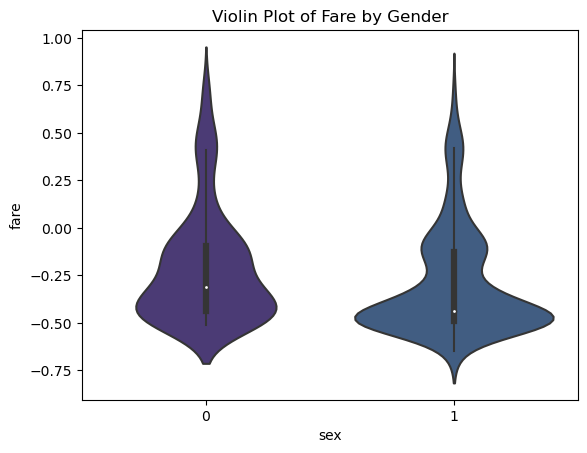

In [68]:
# Violin Plot for 'sex' and 'fare'
sns.violinplot(x='sex', y='fare', data=df)
plt.title('Violin Plot of Fare by Gender')
plt.show()

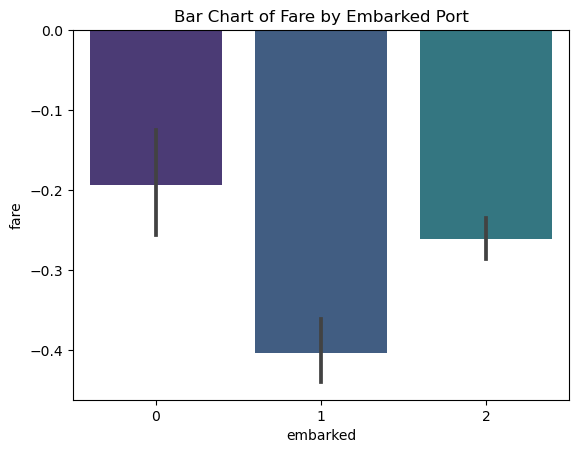

In [69]:
# Bar Chart for 'embarked' and 'fare'
sns.barplot(x='embarked', y='fare', data=df)
plt.title('Bar Chart of Fare by Embarked Port')
plt.show()

### Categorical-Categorical Variables:

    .Stacked Bar Chart:categorical variables ke distributions ko overlap.
    .Grouped BarChart:categorical variables kedistributions koside-by-side.
    .Mosaic Plot: Visualizes association between two categorical variables.

<Axes: xlabel='pclass'>

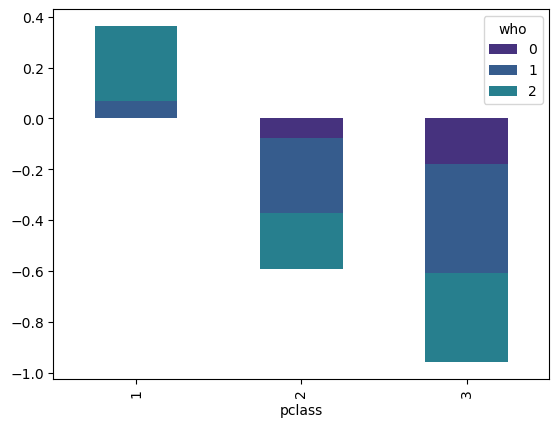

In [70]:
# Stacked Bar Chart for 'sex' and 'survived'
df.groupby(['pclass', 'who'])['fare'].mean().unstack().plot(kind='bar',stacked=True)

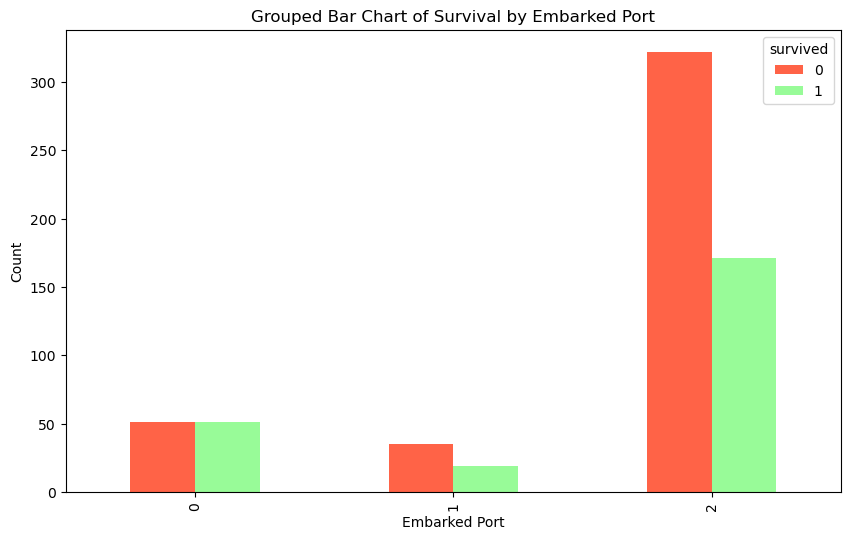

In [71]:
# Grouped Bar Chart for 'embarked' and 'survived'
grouped_bar_data = df.groupby(['embarked', 'survived']).size().unstack()
grouped_bar_data.plot(kind='bar', color=['#FF6347', '#98FB98'], figsize=(10, 6))
plt.title('Grouped Bar Chart of Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

In [72]:
from statsmodels.graphics.mosaicplot import mosaic


In [73]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


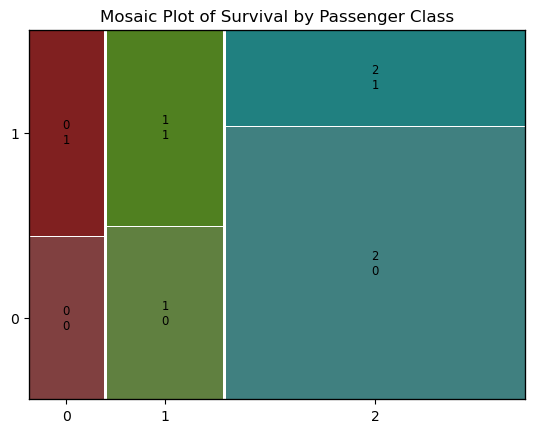

In [74]:
# Mosaic Plot for 'class' and 'survived'
mosaic_data = pd.crosstab(df['class'], df['survived'])
mosaic(mosaic_data.stack(), title='Mosaic Plot of Survival by Passenger Class')
plt.show()

# 6step: Multivariate Analysis:

    1:Multiple Variables:
    2:Pair Plot: Dikhaata hai scatter plots aur histograms for multiple numeric variables.
    3:3D Scatter Plot: For three numeric variables.
    4:Correlation Matrix: Visualizes correlations between multiple numeric variables.

In [75]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


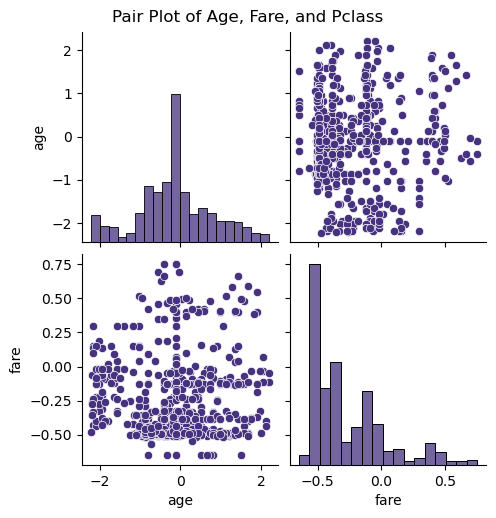

In [76]:
# Pair Plot for multiple numeric variables
sns.pairplot(df[['age', 'fare', 'pclass']])
plt.suptitle('Pair Plot of Age, Fare, and Pclass', y=1.02)
plt.show()

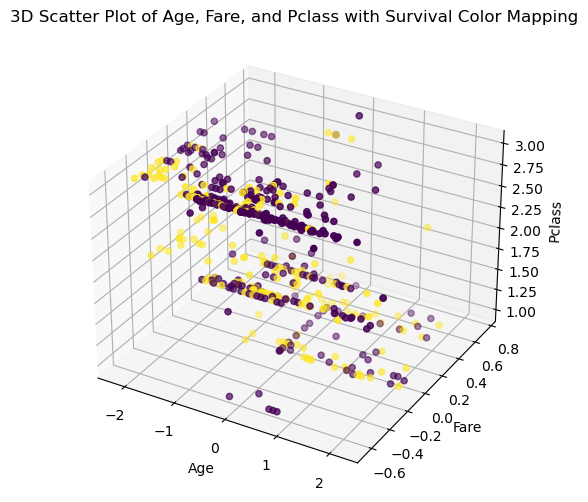

In [77]:
# 3D Scatter Plot for 'age', 'fare', and 'pclass'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['fare'], df['pclass'], c=df['survived'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
ax.set_title('3D Scatter Plot of Age, Fare, and Pclass with Survival Color Mapping')
plt.show()

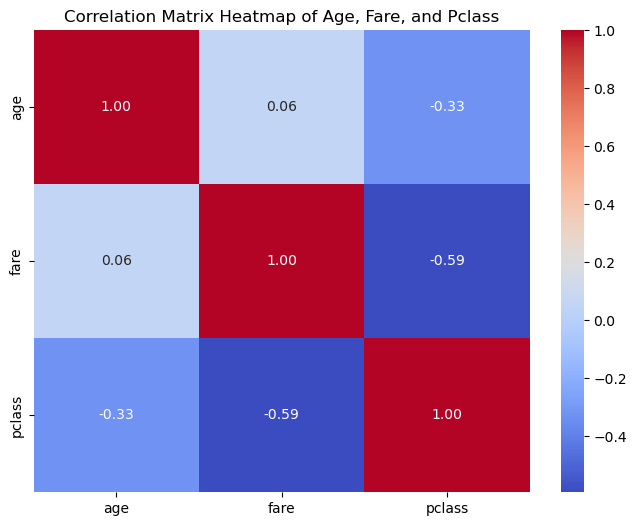

In [78]:
# Correlation Matrix Heatmap
correlation_matrix = df[['age', 'fare', 'pclass']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Age, Fare, and Pclass')
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

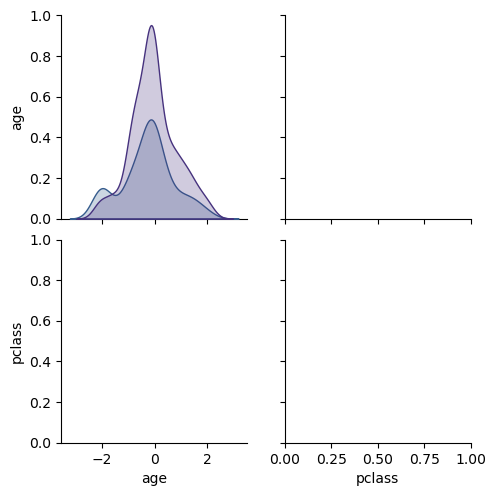

In [79]:
sns.pairplot(df,hue='survived',vars=['age','pclass'])

In [ ]:
sns.boxplot(data=df,x='age')
#give neumeric value


In [ ]:
sns.boxplot(data=df,y='age',x='pclass', hue='alive')

## IQR(Inter quertile range)

In [ ]:
q1 =df['age'].quantile(0.25)
q3 =df['age'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df= df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [ ]:
df.shape

In [ ]:
q1 =df['fare'].quantile(0.25)
q3 =df['fare'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df= df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [ ]:
df.shape

## Z-score method

In [ ]:
# Calculate z-scores for the 'age' column
zscore = np.abs(stats.zscore(df['age']))

# Set a threshold for identifying outliers
threshold = 3

# Identify and remove outliers based on the threshold
df_no_outliers = df[(zscore < threshold)]
df_no_outliers


In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of the Entire Dataset (After Handling Outliers)')
plt.xticks(rotation=45)
plt.show()